In [2]:
# konlpy ÏÑ§Ïπò
!pip install konlpy

# wordcloud ÏÑ§Ïπò
!pip install wordcloud

!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Ìè∞Ìä∏ Îã§Ïö¥Î°úÎìú
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
The following pac

In [4]:
import csv
import pandas as pd
import konlpy
import sys
import numpy as np
from konlpy.tag import Okt
from collections import Counter
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from IPython.display import Image
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
files.upload()

Saving ·Ñã·Ö¶·Ñã·Öµ·Ñâ·Ö¶·Ü´·Ñê·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv to ·Ñã·Ö¶·Ñã·Öµ·Ñâ·Ö¶·Ü´·Ñê·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤ (2).csv
Saving ·Ñí·Ö¶·Ñã·Ö©·ÑÉ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv to ·Ñí·Ö¶·Ñã·Ö©·ÑÉ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤ (2).csv
Saving ·Ñë·Ö≥·ÜØ·ÑÖ·Ö©·ÑÖ·Ö°·Üº·Ñí·Ö£·Üº·ÑÄ·Öµ·Ñà·ÖÆ·Ü∑·Ñà·ÖÆ·Ü∑_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv to ·Ñë·Ö≥·ÜØ·ÑÖ·Ö©·ÑÖ·Ö°·Üº·Ñí·Ö£·Üº·ÑÄ·Öµ·Ñà·ÖÆ·Ü∑·Ñà·ÖÆ·Ü∑_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤ (2).csv
Saving ·Ñè·Ö©·Ñè·Ö©·ÑÉ·Ö©·ÑÖ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv to ·Ñè·Ö©·Ñè·Ö©·ÑÉ·Ö©·ÑÖ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤ (2).csv
Saving ·Ñí·Ö¶·Ñê·Ö≥·ÑÖ·Ö°·Ñâ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv to ·Ñí·Ö¶·Ñê·Ö≥·ÑÖ·Ö°·Ñâ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤ (2).csv


In [6]:
df1 = pd.read_csv('·Ñã·Ö¶·Ñã·Öµ·Ñâ·Ö¶·Ü´·Ñê·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv')
df2 = pd.read_csv('·Ñí·Ö¶·Ñã·Ö©·ÑÉ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv')
df3 = pd.read_csv('·Ñí·Ö¶·Ñê·Ö≥·ÑÖ·Ö°·Ñâ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv')
df4 = pd.read_csv('·Ñè·Ö©·Ñè·Ö©·ÑÉ·Ö©·ÑÖ·Ö≥_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv')
df5 = pd.read_csv('·Ñë·Ö≥·ÜØ·ÑÖ·Ö©·ÑÖ·Ö°·Üº·Ñí·Ö£·Üº·ÑÄ·Öµ·Ñà·ÖÆ·Ü∑·Ñà·ÖÆ·Ü∑_·Ñë·Öß·Üº·Ñå·Ö•·Ü∑·Ñá·Öß·ÜØ·ÑÖ·Öµ·Ñá·Ö≤.csv')

df1.head()

Unnamed: 0  type category  \
0           0  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
1           1  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
2           2  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
3           3  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
4           4  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   

                                              review star       date  \
0  Î∞±Ìï© Ìä§Î¶Ω Ïû•ÎØ∏Ìñ• Ï¢ãÏïÑÌïòÏãúÎ©¥\nüå∏Î¨¥Ï°∞Í±¥üå∏‚öòüå∑üåºüåªüåπ\n\nüçÄÍ∑∏Î¶∞ÏóêÏñ¥Î¶¨ÏóêÏó¨\nÏ†úÍ∞Ä Í∑∏Î¶∞...  ÌèâÏ†ê5  20.12.24.   
1  3Í∞úÍµ¨Îß§ÌïòÎ©¥1Í∞úÏÑúÎπÑÏä§Î°úÏ£ºÏã†Îã§Íµ¨Ìï¥ÏÑú3Í∞úÍµ¨Îß§ÌñàÏñ¥Ïö•ÌèâÏÜåÏóêÎîîÌì®Ï†ÄÎäîÎ∞±ÌôîÏ†êÏóêÏÑúÏÇ¨ÏÑúÏçºÎäîÎç∞Ïö∞Ïó∞ÌûàÏóê...  ÌèâÏ†ê5  21.06.28.   
2  ÏïÑÎãà.....ÎÇò ÎèÑÎåÄÏ≤¥ Ïôú...Ïù¥Ï†úÏÑúÏïº Ïù¥ Ï†úÌíàÏùÑ ÏïåÍ≤å ÎêúÍ±∞Ï£†?? ÏïÑÎãà Ïôú Í∑∏ÎèôÏïà ...  ÌèâÏ†ê5  20.12.01.   
3  ‚ÄúÏª§Ìîº Ìïú ÏûîÏù¥ÎùºÎèÑ ÌïòÍ≥† Í∞àÎûò?‚Äù\n\nÏ∞®Îßà ÎÇòÎäî Ïù¥ ÎßêÏùÑ ÏÑ†Îúª Í∑∏ÎÖÄÏóêÍ≤å Í±¥ÎÑ§ÏßÄ Î™ª...  ÌèâÏ†ê5  21.01.07.   
4  ÍΩÉÏßëÌñ•ÏùÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÌï¥ÏÑú Í≤ÄÏÉâÌïòÎã§Í∞Ä ÏÉÄÎäîÎç∞, Ï†úÌíàÏù¥ Ïú†Î¶¨Î≥ëÏù¥Îùº Í∑∏Îü∞ÏßÄ Íπ®ÏßÄÏßÄÏïäÍ≤å Îã®Îã®...  ÌèâÏ†ê5  21.04.21.   

                                              option                        0  \
0  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÏÜçÎ¶¨ÌïÑ200mlX2‚òÖÌäπÍ∞Ä / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greena...  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÏÜçÎ¶¨ÌïÑ200mlX2‚òÖÌäπÍ∞Ä    
1     ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 11)ÌçºÌîåÎ°úÏ¶à(Î≥∏Ìíà‚òÜ200ml)      ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml    
2       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml    
3    ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 14)Ïò§ÏÖòÎ∏åÎ¶¨Ï¶àOceanbreeze       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml    
4  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 5)Îü∞ÎçîÎ¶¨&Îã§Ïö∞ÎãàLaundry&...      ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml    

                                 1    2    3  
0      ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy X2  NaN  NaN  
1        ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 11)ÌçºÌîåÎ°úÏ¶à(Î≥∏Ìíà‚òÜ200ml)  NaN  NaN  
2         ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy  NaN  NaN  
3      ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 14)Ïò§ÏÖòÎ∏åÎ¶¨Ï¶àOceanbreeze  NaN  NaN  
4   ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 5)Îü∞ÎçîÎ¶¨&Îã§Ïö∞ÎãàLaundry&Downy  NaN  NaN

In [7]:
# Îç∞Ïù¥ÌÑ∞Ìï©ÏπòÍ∏∞
df = pd.concat([df1,df2,df3,df4,df5])
df.head()

Unnamed: 0  type category  \
0           0  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
1           1  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
2           2  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
3           3  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   
4           4  ÏóêÏù¥ÏÑºÌä∏       Î≥ÑÏ†ê   

                                              review star       date  \
0  Î∞±Ìï© Ìä§Î¶Ω Ïû•ÎØ∏Ìñ• Ï¢ãÏïÑÌïòÏãúÎ©¥\nüå∏Î¨¥Ï°∞Í±¥üå∏‚öòüå∑üåºüåªüåπ\n\nüçÄÍ∑∏Î¶∞ÏóêÏñ¥Î¶¨ÏóêÏó¨\nÏ†úÍ∞Ä Í∑∏Î¶∞...  ÌèâÏ†ê5  20.12.24.   
1  3Í∞úÍµ¨Îß§ÌïòÎ©¥1Í∞úÏÑúÎπÑÏä§Î°úÏ£ºÏã†Îã§Íµ¨Ìï¥ÏÑú3Í∞úÍµ¨Îß§ÌñàÏñ¥Ïö•ÌèâÏÜåÏóêÎîîÌì®Ï†ÄÎäîÎ∞±ÌôîÏ†êÏóêÏÑúÏÇ¨ÏÑúÏçºÎäîÎç∞Ïö∞Ïó∞ÌûàÏóê...  ÌèâÏ†ê5  21.06.28.   
2  ÏïÑÎãà.....ÎÇò ÎèÑÎåÄÏ≤¥ Ïôú...Ïù¥Ï†úÏÑúÏïº Ïù¥ Ï†úÌíàÏùÑ ÏïåÍ≤å ÎêúÍ±∞Ï£†?? ÏïÑÎãà Ïôú Í∑∏ÎèôÏïà ...  ÌèâÏ†ê5  20.12.01.   
3  ‚ÄúÏª§Ìîº Ìïú ÏûîÏù¥ÎùºÎèÑ ÌïòÍ≥† Í∞àÎûò?‚Äù\n\nÏ∞®Îßà ÎÇòÎäî Ïù¥ ÎßêÏùÑ ÏÑ†Îúª Í∑∏ÎÖÄÏóêÍ≤å Í±¥ÎÑ§ÏßÄ Î™ª...  ÌèâÏ†ê5  21.01.07.   
4  ÍΩÉÏßëÌñ•ÏùÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÌï¥ÏÑú Í≤ÄÏÉâÌïòÎã§Í∞Ä ÏÉÄÎäîÎç∞, Ï†úÌíàÏù¥ Ïú†Î¶¨Î≥ëÏù¥Îùº Í∑∏Îü∞ÏßÄ Íπ®ÏßÄÏßÄÏïäÍ≤å Îã®Îã®...  ÌèâÏ†ê5  21.04.21.   

                                              option                        0  \
0  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÏÜçÎ¶¨ÌïÑ200mlX2‚òÖÌäπÍ∞Ä / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greena...  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÏÜçÎ¶¨ÌïÑ200mlX2‚òÖÌäπÍ∞Ä    
1     ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 11)ÌçºÌîåÎ°úÏ¶à(Î≥∏Ìíà‚òÜ200ml)      ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml    
2       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml    
3    ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 14)Ïò§ÏÖòÎ∏åÎ¶¨Ï¶àOceanbreeze       ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: Ïã§ÎÇ¥Î≥∏Ìíà200ml    
4  ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml / ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 5)Îü∞ÎçîÎ¶¨&Îã§Ïö∞ÎãàLaundry&...      ÎîîÌì®Ï†Ä ÏÑ†ÌÉù: ‚òÜÏã§ÎÇ¥Î≥∏Ìíà200ml    

                                 1    2    3    4    5    6    7    8  
0      ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy X2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1        ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 11)ÌçºÌîåÎ°úÏ¶à(Î≥∏Ìíà‚òÜ200ml)  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 7)Í∑∏Î¶∞ÏóêÏñ¥Î¶¨Greenairy  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3      ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 14)Ïò§ÏÖòÎ∏åÎ¶¨Ï¶àOceanbreeze  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4   ÎîîÌì®Ï†Ä Ìñ•Í∏∞: 5)Îü∞ÎçîÎ¶¨&Îã§Ïö∞ÎãàLaundry&Downy  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [8]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Îßå Î≥¥Í∏∞
df = df[['review','star']]
df

review star
0     Î∞±Ìï© Ìä§Î¶Ω Ïû•ÎØ∏Ìñ• Ï¢ãÏïÑÌïòÏãúÎ©¥\nüå∏Î¨¥Ï°∞Í±¥üå∏‚öòüå∑üåºüåªüåπ\n\nüçÄÍ∑∏Î¶∞ÏóêÏñ¥Î¶¨ÏóêÏó¨\nÏ†úÍ∞Ä Í∑∏Î¶∞...  ÌèâÏ†ê5
1     3Í∞úÍµ¨Îß§ÌïòÎ©¥1Í∞úÏÑúÎπÑÏä§Î°úÏ£ºÏã†Îã§Íµ¨Ìï¥ÏÑú3Í∞úÍµ¨Îß§ÌñàÏñ¥Ïö•ÌèâÏÜåÏóêÎîîÌì®Ï†ÄÎäîÎ∞±ÌôîÏ†êÏóêÏÑúÏÇ¨ÏÑúÏçºÎäîÎç∞Ïö∞Ïó∞ÌûàÏóê...  ÌèâÏ†ê5
2     ÏïÑÎãà.....ÎÇò ÎèÑÎåÄÏ≤¥ Ïôú...Ïù¥Ï†úÏÑúÏïº Ïù¥ Ï†úÌíàÏùÑ ÏïåÍ≤å ÎêúÍ±∞Ï£†?? ÏïÑÎãà Ïôú Í∑∏ÎèôÏïà ...  ÌèâÏ†ê5
3     ‚ÄúÏª§Ìîº Ìïú ÏûîÏù¥ÎùºÎèÑ ÌïòÍ≥† Í∞àÎûò?‚Äù\n\nÏ∞®Îßà ÎÇòÎäî Ïù¥ ÎßêÏùÑ ÏÑ†Îúª Í∑∏ÎÖÄÏóêÍ≤å Í±¥ÎÑ§ÏßÄ Î™ª...  ÌèâÏ†ê5
4     ÍΩÉÏßëÌñ•ÏùÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÌï¥ÏÑú Í≤ÄÏÉâÌïòÎã§Í∞Ä ÏÉÄÎäîÎç∞, Ï†úÌíàÏù¥ Ïú†Î¶¨Î≥ëÏù¥Îùº Í∑∏Îü∞ÏßÄ Íπ®ÏßÄÏßÄÏïäÍ≤å Îã®Îã®...  ÌèâÏ†ê5
...                                                 ...  ...
3351                        ÎÉÑÏÉàÍ∞Ä Î∞ïÏπ¥Ïä§ÎÉÑÏÉàÎπÑÏä∑ÌïòÎÑ§Ïöî;; Îã§Î•∏Ìñ•ÏùÄ Ï¢ãÍ≤üÏ£†;;  ÌèâÏ†ê1
3352  ÌõÑÍ∏∞Ï¢ãÏïÑÏÑú ÌíçÏûêÎãòÎØøÍ≥† Íµ¨Îß§ÌñàÎäîÎç∞ Ï†úÏä§ÌÉàÏùÄ\nÏïÑÎãàÎÑ§Ïöî Ìñ•ÎëêÍ∞ú Í≥®Í≥†Î£®ÏÉÄÎäîÎç∞ ÎëòÎã§‚Ä¶Ïãº Ìñ•...  ÌèâÏ†ê1
3353  Í¥ëÍ≥†Î•º ÎÑàÎ¨¥Ìï¥ÏÑú Íµ¨Îß§Ìï¥Î¥§ÎäîÎç∞ Ïó≠ÏãúÎÇò..Îòê ÎãπÌñà‚Ä¶\nÎÑàÎ¨¥ ÌïòÎÑ§‚Ä¶Í∑ºÏ≤òÏóêÏÑúÎèÑ Ìñ•Ïù¥ ÎäêÍª¥ÏßÄ...  ÌèâÏ†ê1
3354  ÏïàÎ∞© ÌïòÎÇò Í±∞Ïã§ ÌïòÎÇò ÎíÄÍ≥† ÌïúÎã¨ÎèÑ ÏïàÎêêÎäîÎç∞ Ï†ÄÎ†áÍ≤å Ï§ÑÏñ¥ÏûàÍ≥† ÎÉÑÏÉà ÌïòÎÇòÎèÑ Ïïà ÎÇòÏö© ÌíÄ...  ÌèâÏ†ê1
3355                      ÏßÑÏßú ÏôÑÏ†Ñ Î≥ÑÎ°ú Ïú†Ìà¨Î∏å Î≥¥Í≥† ÏÇ∞Í±¥Îç∞ ÏßÑÏßú ÌõÑÌöå ÌñàÏñ¥Ïöî  ÌèâÏ†ê1

[19519 rows x 2 columns]

In [9]:
# ÌèâÏ†êÎ≥ÑÎ°ú ÎÇòÎàÑÍ∏∞

df5 = df[df['star'] == 'ÌèâÏ†ê5']
df4 = df[df['star'] == 'ÌèâÏ†ê4']
df3 = df[df['star'] == 'ÌèâÏ†ê3']
df2 = df[df['star'] == 'ÌèâÏ†ê2']
df1 = df[df['star'] == 'ÌèâÏ†ê1']

df5.head()

review star
0  Î∞±Ìï© Ìä§Î¶Ω Ïû•ÎØ∏Ìñ• Ï¢ãÏïÑÌïòÏãúÎ©¥\nüå∏Î¨¥Ï°∞Í±¥üå∏‚öòüå∑üåºüåªüåπ\n\nüçÄÍ∑∏Î¶∞ÏóêÏñ¥Î¶¨ÏóêÏó¨\nÏ†úÍ∞Ä Í∑∏Î¶∞...  ÌèâÏ†ê5
1  3Í∞úÍµ¨Îß§ÌïòÎ©¥1Í∞úÏÑúÎπÑÏä§Î°úÏ£ºÏã†Îã§Íµ¨Ìï¥ÏÑú3Í∞úÍµ¨Îß§ÌñàÏñ¥Ïö•ÌèâÏÜåÏóêÎîîÌì®Ï†ÄÎäîÎ∞±ÌôîÏ†êÏóêÏÑúÏÇ¨ÏÑúÏçºÎäîÎç∞Ïö∞Ïó∞ÌûàÏóê...  ÌèâÏ†ê5
2  ÏïÑÎãà.....ÎÇò ÎèÑÎåÄÏ≤¥ Ïôú...Ïù¥Ï†úÏÑúÏïº Ïù¥ Ï†úÌíàÏùÑ ÏïåÍ≤å ÎêúÍ±∞Ï£†?? ÏïÑÎãà Ïôú Í∑∏ÎèôÏïà ...  ÌèâÏ†ê5
3  ‚ÄúÏª§Ìîº Ìïú ÏûîÏù¥ÎùºÎèÑ ÌïòÍ≥† Í∞àÎûò?‚Äù\n\nÏ∞®Îßà ÎÇòÎäî Ïù¥ ÎßêÏùÑ ÏÑ†Îúª Í∑∏ÎÖÄÏóêÍ≤å Í±¥ÎÑ§ÏßÄ Î™ª...  ÌèâÏ†ê5
4  ÍΩÉÏßëÌñ•ÏùÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÌï¥ÏÑú Í≤ÄÏÉâÌïòÎã§Í∞Ä ÏÉÄÎäîÎç∞, Ï†úÌíàÏù¥ Ïú†Î¶¨Î≥ëÏù¥Îùº Í∑∏Îü∞ÏßÄ Íπ®ÏßÄÏßÄÏïäÍ≤å Îã®Îã®...  ÌèâÏ†ê5

In [10]:
# review Îç∞Ïù¥ÌÑ∞Îßå Î≥¥Í∏∞
df5 = df5[['review']]
df4 = df4[['review']]
df3 = df3[['review']]
df2 = df2[['review']]
df1 = df1[['review']]

df5.head()

review
0  Î∞±Ìï© Ìä§Î¶Ω Ïû•ÎØ∏Ìñ• Ï¢ãÏïÑÌïòÏãúÎ©¥\nüå∏Î¨¥Ï°∞Í±¥üå∏‚öòüå∑üåºüåªüåπ\n\nüçÄÍ∑∏Î¶∞ÏóêÏñ¥Î¶¨ÏóêÏó¨\nÏ†úÍ∞Ä Í∑∏Î¶∞...
1  3Í∞úÍµ¨Îß§ÌïòÎ©¥1Í∞úÏÑúÎπÑÏä§Î°úÏ£ºÏã†Îã§Íµ¨Ìï¥ÏÑú3Í∞úÍµ¨Îß§ÌñàÏñ¥Ïö•ÌèâÏÜåÏóêÎîîÌì®Ï†ÄÎäîÎ∞±ÌôîÏ†êÏóêÏÑúÏÇ¨ÏÑúÏçºÎäîÎç∞Ïö∞Ïó∞ÌûàÏóê...
2  ÏïÑÎãà.....ÎÇò ÎèÑÎåÄÏ≤¥ Ïôú...Ïù¥Ï†úÏÑúÏïº Ïù¥ Ï†úÌíàÏùÑ ÏïåÍ≤å ÎêúÍ±∞Ï£†?? ÏïÑÎãà Ïôú Í∑∏ÎèôÏïà ...
3  ‚ÄúÏª§Ìîº Ìïú ÏûîÏù¥ÎùºÎèÑ ÌïòÍ≥† Í∞àÎûò?‚Äù\n\nÏ∞®Îßà ÎÇòÎäî Ïù¥ ÎßêÏùÑ ÏÑ†Îúª Í∑∏ÎÖÄÏóêÍ≤å Í±¥ÎÑ§ÏßÄ Î™ª...
4  ÍΩÉÏßëÌñ•ÏùÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÌï¥ÏÑú Í≤ÄÏÉâÌïòÎã§Í∞Ä ÏÉÄÎäîÎç∞, Ï†úÌíàÏù¥ Ïú†Î¶¨Î≥ëÏù¥Îùº Í∑∏Îü∞ÏßÄ Íπ®ÏßÄÏßÄÏïäÍ≤å Îã®Îã®...

# 5Ï†ê



In [11]:
# 5Ï†ê Konlpy

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ìï¥Ï†úÌïòÏó¨ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df_list = df5.values.tolist()

# Ïù¥Ï§ëÎ¶¨Ïä§Ìä∏Î•º Îã®ÏùºÎ¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df_list = np.array(df_list).flatten()

# Î¶¨Ïä§Ìä∏Î•º Ìï¥Ï†ú ÏãúÌÇ§Í≥† Î¨∏ÏûêÏó¥ ÌòïÌÉúÎ°ú Î≥ÄÌôò
df_str = "".join(df_list)

# Î¨∏ÏûêÏó¥ÏùÑ txt ÌòïÌÉúÎ°ú Ï†ÄÏû•
f = open("abc5.txt","w",encoding='utf-8')
f.write(df_str)
f.close()

# KonlpyÎ°ú ÌÖçÏä§Ìä∏ Ï∂îÏ∂ú
with open('abc5.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # Î™ÖÏÇ¨Îßå Ï∂îÏ∂ú

words = [n for n in nouns if len(n) > 1] # Îã®Ïñ¥Ïùò Í∏∏Ïù¥Í∞Ä 1Í∞úÏù∏ Í≤ÉÏùÄ Ï†úÏô∏

c = Counter(words) # ÏúÑÏóêÏÑú ÏñªÏùÄ wordsÎ•º Ï≤òÎ¶¨ÌïòÏó¨ Îã®Ïñ¥Î≥Ñ ÎπàÎèÑÏàò ÌòïÌÉúÏùò ÎîïÏÖîÎÑàÎ¶¨ Îç∞Ïù¥ÌÑ∞Î•º Íµ¨Ìï®

In [12]:
# 5Ï†ê Î™ÖÏÇ¨ ÎπàÎèÑ Ïπ¥Ïö¥Ìä∏
noun_list = c.most_common(100) 
for n in noun_list:
    print(n)

('Íµ¨Îß§', 3807)
('ÎÉÑÏÉà', 3314)
('Ìì®Ï†Ä', 2799)
('ÏóêÏñ¥Î¶¨', 2467)
('Ìñ•Í∏∞', 2456)
('Í∑∏Î¶∞', 2136)
('ÌôîÏû•Ïã§', 1964)
('ÎäêÎÇå', 1834)
('Î∞úÌñ•', 1755)
('ÏßÑÏßú', 1658)
('Ïä§Ìã±', 1636)
('ÏÇ¨Ïö©', 1605)
('Ï†ïÎßê', 1545)
('Ï£ºÎ¨∏', 1455)
('Í∏∞Î∂Ñ', 1373)
('ÏÑ†Î¨º', 1321)
('ÏÉùÍ∞Å', 1318)
('ÌïòÎÇò', 1257)
('Í±∞Ïã§', 1235)
('Î∞∞ÏÜ°', 1181)
('Ï†úÌíà', 1140)
('Îã§Î•∏', 1075)
('ÏÑ¨Ïú†', 985)
('Ï≤òÏùå', 942)
('Í∞ÄÍ≤©', 939)
('Ìñ•Ïàò', 936)
('ÍΩÉÏßë', 934)
('ÌõÑÍ∏∞', 930)
('ÎπÑÎàÑ', 910)
('Ìè¨Ïû•', 820)
('ÏÇ¨ÏùÄ', 816)
('Î®∏Î¶¨', 790)
('Ï†ïÎèÑ', 778)
('Îã§Ïùå', 755)
('Ïö©Îüâ', 753)
('Î≥¥Í≥†', 750)
('Î¶¨Î∑∞', 738)
('Ìè¨Î†àÏä§Ìä∏', 724)
('Ï≤òÏÜù', 722)
('Ï∂îÏ≤ú', 711)
('ÏÑºÌä∏', 709)
('ÎßàÏùå', 702)
('ÏóêÏù¥', 701)
('ÌîåÎùºÏõå', 697)
('Îã¨Îã¨', 684)
('Ïù∏ÌÖåÎ¶¨Ïñ¥', 663)
('Ï≤¥Î¶¨', 655)
('Ïö∞Îîî', 649)
('Íµ¨ÏûÖ', 647)
('Îã§Ïö∞Îãà', 639)
('Í≥†ÎØº', 627)
('ÎîîÌì®Ï†∏', 613)
('Ïù¥Î≤à', 597)
('Î®∏Ïä§ÌÅ¨', 569)
('Î†àÏù∏', 503)
('ÏÑ†ÌÉù', 497)
('Ï°∞Í∏à', 489)
('Ï†úÏùº', 488)
('Î∞©Ìñ•', 487)
('Ïù

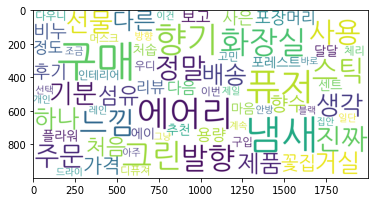

In [13]:
# 5Ï†ê Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=2000, height=1000, prefer_horizontal = 1, max_font_size=250, max_words=70)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú_5Ï†ê.png')

# 4Ï†ê

In [14]:
# 4Ï†ê Konlpy

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ìï¥Ï†úÌïòÏó¨ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df_list = df4.values.tolist()

# Ïù¥Ï§ëÎ¶¨Ïä§Ìä∏Î•º Îã®ÏùºÎ¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df_list = np.array(df_list).flatten()

# Î¶¨Ïä§Ìä∏Î•º Ìï¥Ï†ú ÏãúÌÇ§Í≥† Î¨∏ÏûêÏó¥ ÌòïÌÉúÎ°ú Î≥ÄÌôò
df_str = "".join(df_list)

# Î¨∏ÏûêÏó¥ÏùÑ txt ÌòïÌÉúÎ°ú Ï†ÄÏû•
f = open("abc4.txt","w",encoding='utf-8')
f.write(df_str)
f.close()

# KonlpyÎ°ú ÌÖçÏä§Ìä∏ Ï∂îÏ∂ú
with open('abc4.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # Î™ÖÏÇ¨Îßå Ï∂îÏ∂ú

words = [n for n in nouns if len(n) > 1] # Îã®Ïñ¥Ïùò Í∏∏Ïù¥Í∞Ä 1Í∞úÏù∏ Í≤ÉÏùÄ Ï†úÏô∏

c = Counter(words) # ÏúÑÏóêÏÑú ÏñªÏùÄ wordsÎ•º Ï≤òÎ¶¨ÌïòÏó¨ Îã®Ïñ¥Î≥Ñ ÎπàÎèÑÏàò ÌòïÌÉúÏùò ÎîïÏÖîÎÑàÎ¶¨ Îç∞Ïù¥ÌÑ∞Î•º Íµ¨Ìï®

In [15]:
# 4Ï†ê Î™ÖÏÇ¨ ÎπàÎèÑ Ïπ¥Ïö¥Ìä∏
noun_list = c.most_common(100) 
for n in noun_list:
    print(n)

('Íµ¨Îß§', 1005)
('ÎÉÑÏÉà', 944)
('Î∞úÌñ•', 847)
('Î∞∞ÏÜ°', 748)
('ÏÉùÍ∞Å', 740)
('Ìñ•Í∏∞', 718)
('Ïä§Ìã±', 710)
('ÏÇ¨Ïö©', 613)
('ÏóêÏñ¥Î¶¨', 572)
('Í∑∏Î¶∞', 539)
('ÌôîÏû•Ïã§', 535)
('ÌïòÎÇò', 486)
('ÎäêÎÇå', 482)
('Ìì®Ï†Ä', 445)
('ÏÑ†Î¨º', 442)
('Ï£ºÎ¨∏', 430)
('Ï≤òÏùå', 421)
('Í∞ÄÍ≤©', 415)
('Ï°∞Í∏à', 364)
('Îã§Î•∏', 361)
('Ìè¨Ïû•', 344)
('Í±∞Ïã§', 326)
('Ï†úÌíà', 312)
('Ïö©Îüâ', 291)
('Î®∏Î¶¨', 262)
('Îã§Ïùå', 259)
('Ï†ïÎèÑ', 258)
('Ï†ïÎßê', 256)
('ÏßÑÏßú', 256)
('ÏÇ¨ÏùÄ', 255)
('Íµ¨ÏûÖ', 253)
('ÏÑ¨Ïú†', 243)
('Î≥¥Í≥†', 237)
('ÌõÑÍ∏∞', 220)
('Ìñ•Ïàò', 216)
('ÎπÑÎàÑ', 213)
('ÍΩÉÏßë', 200)
('Í∏∞Î∂Ñ', 198)
('Í∞úÏù∏', 198)
('ÌîåÎùºÏõå', 198)
('Ï∑®Ìñ•', 192)
('Ìè¨Î†àÏä§Ìä∏', 190)
('Ïù∏ÌÖåÎ¶¨Ïñ¥', 188)
('Ï≤¥Î¶¨', 180)
('Í∑∏ÎÉ•', 178)
('Î≥ÑÎ°ú', 177)
('ÎßàÏùå', 170)
('Ïö∞Îîî', 165)
('ÏïΩÍ∞Ñ', 163)
('Î∏îÎûô', 160)
('Îã§Ïö∞Îãà', 160)
('Îã¨Îã¨', 159)
('Í∞ÄÏÑ±', 158)
('ÏÇ¥Ïßù', 156)
('Î¶¨Î∑∞', 153)
('Ï≤òÏÜù', 151)
('ÏùºÎã®', 150)
('ÏßÄÏÜç', 149)
('ÏÑ†ÌÉù', 147)
('ÏÉÅÌíà', 146)
('ÎîîÏûêÏù∏', 1

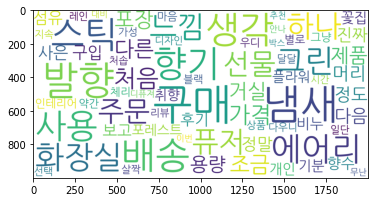

In [16]:
# 4Ï†ê Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=2000, height=1000, prefer_horizontal = 1, max_font_size=250, max_words=70)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú_4Ï†ê.png')

#3Ï†ê

In [17]:
# 3Ï†ê Konlpy

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ìï¥Ï†úÌïòÏó¨ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df_list = df3.values.tolist()

# Ïù¥Ï§ëÎ¶¨Ïä§Ìä∏Î•º Îã®ÏùºÎ¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df_list = np.array(df_list).flatten()

# Î¶¨Ïä§Ìä∏Î•º Ìï¥Ï†ú ÏãúÌÇ§Í≥† Î¨∏ÏûêÏó¥ ÌòïÌÉúÎ°ú Î≥ÄÌôò
df_str = "".join(df_list)

# Î¨∏ÏûêÏó¥ÏùÑ txt ÌòïÌÉúÎ°ú Ï†ÄÏû•
f = open("abc3.txt","w",encoding='utf-8')
f.write(df_str)
f.close()

# KonlpyÎ°ú ÌÖçÏä§Ìä∏ Ï∂îÏ∂ú
with open('abc3.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # Î™ÖÏÇ¨Îßå Ï∂îÏ∂ú

words = [n for n in nouns if len(n) > 1] # Îã®Ïñ¥Ïùò Í∏∏Ïù¥Í∞Ä 1Í∞úÏù∏ Í≤ÉÏùÄ Ï†úÏô∏

c = Counter(words) # ÏúÑÏóêÏÑú ÏñªÏùÄ wordsÎ•º Ï≤òÎ¶¨ÌïòÏó¨ Îã®Ïñ¥Î≥Ñ ÎπàÎèÑÏàò ÌòïÌÉúÏùò ÎîïÏÖîÎÑàÎ¶¨ Îç∞Ïù¥ÌÑ∞Î•º Íµ¨Ìï®

In [18]:
# 3Ï†ê Î™ÖÏÇ¨ ÎπàÎèÑ Ïπ¥Ïö¥Ìä∏
noun_list = c.most_common(100) 
for n in noun_list:
    print(n)

('ÎÉÑÏÉà', 559)
('Î∞úÌñ•', 521)
('ÏÉùÍ∞Å', 468)
('Íµ¨Îß§', 401)
('Ïä§Ìã±', 348)
('Î∞∞ÏÜ°', 315)
('Ìñ•Í∏∞', 301)
('ÏÇ¨Ïö©', 261)
('Ï≤òÏùå', 237)
('ÏïàÎÇò', 213)
('Ìì®Ï†Ä', 189)
('Î≥ÑÎ°ú', 185)
('ÌôîÏû•Ïã§', 183)
('Í∑∏ÎÉ•', 179)
('Î®∏Î¶¨', 175)
('ÏóêÏñ¥Î¶¨', 172)
('ÌïòÎÇò', 165)
('Í∞ÄÍ≤©', 162)
('Í∑∏Î¶∞', 156)
('ÏÑ†Î¨º', 156)
('Ï°∞Í∏à', 154)
('ÎäêÎÇå', 153)
('Ï†ïÎèÑ', 150)
('Ìè¨Ïû•', 149)
('Ï£ºÎ¨∏', 144)
('Îã§Î•∏', 138)
('Î≥¥Í≥†', 126)
('ÏßÄÏÜç', 104)
('Í±∞Ïã§', 101)
('Ï†úÌíà', 100)
('Ï≤¥Î¶¨', 97)
('Ï∑®Ìñ•', 95)
('Î¶¨Î∑∞', 92)
('ÏÇ¨ÏùÄ', 91)
('Ï†ïÎßê', 87)
('ÏÉÅÌíà', 86)
('Ìè¨Î†àÏä§Ìä∏', 82)
('Ïö©Îüâ', 80)
('ÏãúÍ∞Ñ', 79)
('Í±∞Ïùò', 75)
('Îã§Ïùå', 74)
('Í∞ÄÏßÄ', 74)
('ÎπÑÎàÑ', 73)
('ÌõÑÍ∏∞', 73)
('Î∏îÎûô', 72)
('ÏßÑÏßú', 71)
('Íµ¨ÏûÖ', 70)
('Î∞©Ìñ•', 68)
('Í∞ÄÏÑ±', 68)
('ÏÑ†ÌÉù', 67)
('Î¨¥ÎÇú', 66)
('ÏùºÎã®', 65)
('Í∞úÏù∏', 64)
('Ìñ•Ïàò', 62)
('ÏïΩÍ∞Ñ', 61)
('ÏÑ¨Ïú†', 60)
('Í∞ÄÍπåÏù¥', 59)
('ÏÇ¥Ïßù', 58)
('ÎÇ®Ïûê', 57)
('ÎåÄÎπÑ', 57)
('ÏûêÏ≤¥', 55)
('Ïù¥Î≤à', 54)
('Îã¨Îã¨', 53)
('ÏïÑÏ£º',

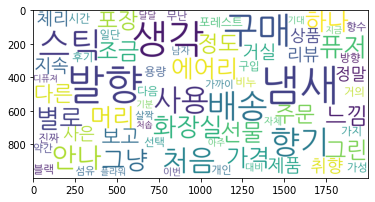

In [19]:
# 3Ï†ê Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=2000, height=1000, prefer_horizontal = 1, max_font_size=250, max_words=70)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú_3Ï†ê.png')

#2Ï†ê

In [20]:
# 2Ï†ê Konlpy

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ìï¥Ï†úÌïòÏó¨ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df_list = df2.values.tolist()

# Ïù¥Ï§ëÎ¶¨Ïä§Ìä∏Î•º Îã®ÏùºÎ¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df_list = np.array(df_list).flatten()

# Î¶¨Ïä§Ìä∏Î•º Ìï¥Ï†ú ÏãúÌÇ§Í≥† Î¨∏ÏûêÏó¥ ÌòïÌÉúÎ°ú Î≥ÄÌôò
df_str = "".join(df_list)

# Î¨∏ÏûêÏó¥ÏùÑ txt ÌòïÌÉúÎ°ú Ï†ÄÏû•
f = open("abc2.txt","w",encoding='utf-8')
f.write(df_str)
f.close()

# KonlpyÎ°ú ÌÖçÏä§Ìä∏ Ï∂îÏ∂ú
with open('abc2.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # Î™ÖÏÇ¨Îßå Ï∂îÏ∂ú

words = [n for n in nouns if len(n) > 1] # Îã®Ïñ¥Ïùò Í∏∏Ïù¥Í∞Ä 1Í∞úÏù∏ Í≤ÉÏùÄ Ï†úÏô∏

c = Counter(words) # ÏúÑÏóêÏÑú ÏñªÏùÄ wordsÎ•º Ï≤òÎ¶¨ÌïòÏó¨ Îã®Ïñ¥Î≥Ñ ÎπàÎèÑÏàò ÌòïÌÉúÏùò ÎîïÏÖîÎÑàÎ¶¨ Îç∞Ïù¥ÌÑ∞Î•º Íµ¨Ìï®

In [21]:
# 2Ï†ê Î™ÖÏÇ¨ ÎπàÎèÑ Ïπ¥Ïö¥Ìä∏
noun_list = c.most_common(100) 
for n in noun_list:
    print(n)

('ÎÉÑÏÉà', 163)
('Î∞úÌñ•', 151)
('ÏïàÎÇò', 121)
('Ïä§Ìã±', 114)
('Íµ¨Îß§', 97)
('ÏÉùÍ∞Å', 86)
('Î≥ÑÎ°ú', 81)
('Î®∏Î¶¨', 74)
('Ìñ•Í∏∞', 74)
('Ï≤òÏùå', 63)
('Ìì®Ï†Ä', 56)
('Í∑∏ÎÉ•', 52)
('ÏÇ¨Ïö©', 50)
('Ï†ïÎèÑ', 47)
('Ï†úÌíà', 47)
('Î∞∞ÏÜ°', 47)
('ÌïòÎÇò', 46)
('ÌôîÏû•Ïã§', 44)
('Î≥¥Í≥†', 43)
('Í±∞Ïã§', 42)
('ÌõÑÍ∏∞', 41)
('Ìè¨Ïû•', 40)
('Í±∞Ïùò', 37)
('ÏóêÏñ¥Î¶¨', 34)
('Ï∑®Ìñ•', 34)
('Í∑∏Î¶∞', 33)
('ÎäêÎÇå', 32)
('Ïã§Îßù', 31)
('ÏÑ†Î¨º', 30)
('ÏßÑÏßú', 28)
('Ï£ºÎ¨∏', 28)
('Í∞ÄÍπåÏù¥', 28)
('Í∞úÏù∏', 26)
('Í∞ÄÍ≤©', 26)
('Îã§Î•∏', 26)
('Ïù¥Î≤à', 24)
('Î¶¨Î∑∞', 24)
('ÎπÑÎàÑ', 23)
('Ï†ÑÌòÄ', 23)
('Ï°∞Í∏à', 22)
('Ï≤¥Î¶¨', 22)
('Ï†ïÎßê', 21)
('Ìè¨Î†àÏä§Ìä∏', 20)
('Í≥ÑÏÜç', 20)
('ÏãúÍ∞Ñ', 20)
('Ïù¥Í±¥', 19)
('Íµ¨ÏûÖ', 19)
('Ïö∞Îîî', 19)
('ÎöúÍªë', 19)
('Îã§Ïãú', 19)
('ÏùºÏ£ºÏùº', 19)
('Í∏∞ÎåÄ', 17)
('ÌïòÎ£®', 17)
('Î∞ïÏä§', 17)
('ÏßÄÏÜç', 16)
('ÏïΩÍ∞Ñ', 15)
('ÏÑ†ÌÉù', 15)
('Îã§Ïö∞Îãà', 14)
('Ï†úÏùº', 14)
('Ïä§ÌÇ®', 14)
('Î∞©Ìñ•', 14)
('ÏûòÎ™ª', 14)
('ÏÉÅÌíà', 14)
('Í¥ëÍ≥†', 14)
('ÏÑ§Î™Ö', 13)


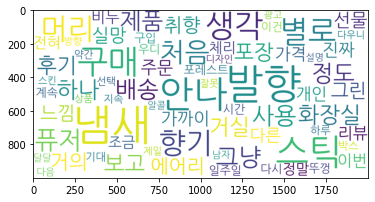

In [22]:
# 2Ï†ê Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=2000, height=1000, prefer_horizontal = 1, max_font_size=250, max_words=70)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú_2Ï†ê.png')

#1Ï†ê

In [23]:
# 1Ï†ê Konlpy

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ìï¥Ï†úÌïòÏó¨ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df_list = df1.values.tolist()

# Ïù¥Ï§ëÎ¶¨Ïä§Ìä∏Î•º Îã®ÏùºÎ¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df_list = np.array(df_list).flatten()

# Î¶¨Ïä§Ìä∏Î•º Ìï¥Ï†ú ÏãúÌÇ§Í≥† Î¨∏ÏûêÏó¥ ÌòïÌÉúÎ°ú Î≥ÄÌôò
df_str = "".join(df_list)

# Î¨∏ÏûêÏó¥ÏùÑ txt ÌòïÌÉúÎ°ú Ï†ÄÏû•
f = open("abc1.txt","w",encoding='utf-8')
f.write(df_str)
f.close()

# KonlpyÎ°ú ÌÖçÏä§Ìä∏ Ï∂îÏ∂ú
with open('abc1.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # Î™ÖÏÇ¨Îßå Ï∂îÏ∂ú

words = [n for n in nouns if len(n) > 1] # Îã®Ïñ¥Ïùò Í∏∏Ïù¥Í∞Ä 1Í∞úÏù∏ Í≤ÉÏùÄ Ï†úÏô∏

c = Counter(words) # ÏúÑÏóêÏÑú ÏñªÏùÄ wordsÎ•º Ï≤òÎ¶¨ÌïòÏó¨ Îã®Ïñ¥Î≥Ñ ÎπàÎèÑÏàò ÌòïÌÉúÏùò ÎîïÏÖîÎÑàÎ¶¨ Îç∞Ïù¥ÌÑ∞Î•º Íµ¨Ìï®

In [24]:
# 1Ï†ê Î™ÖÏÇ¨ ÎπàÎèÑ Ïπ¥Ïö¥Ìä∏
noun_list = c.most_common(100) 
for n in noun_list:
    print(n)

('ÎÉÑÏÉà', 278)
('Î∞úÌñ•', 142)
('Íµ¨Îß§', 132)
('ÏïàÎÇò', 132)
('Ïä§Ìã±', 114)
('Ìì®Ï†Ä', 112)
('Î®∏Î¶¨', 98)
('Î≥ÑÎ°ú', 93)
('ÌïòÎÇò', 89)
('Ï†úÌíà', 85)
('Î∞∞ÏÜ°', 81)
('Ìñ•Í∏∞', 71)
('ÏßÑÏßú', 70)
('Í∑∏ÎÉ•', 66)
('Î¶¨Î∑∞', 65)
('ÏÉùÍ∞Å', 64)
('Ï†ÑÌòÄ', 61)
('Ï≤òÏùå', 60)
('Ï£ºÎ¨∏', 55)
('ÏÇ¨Ïö©', 52)
('Îã§Î•∏', 52)
('Ïã§Îßù', 48)
('ÌõÑÍ∏∞', 46)
('Í±∞Ïùò', 39)
('ÌôîÏû•Ïã§', 37)
('Í¥ëÍ≥†', 36)
('Ï†ïÎèÑ', 34)
('Î≥¥Í≥†', 33)
('ÏïàÎÇ®', 33)
('ÏÉÅÌíà', 30)
('Î∞îÎ°ú', 30)
('ÎöúÍªë', 28)
('ÏóêÏñ¥Î¶¨', 28)
('ÏÑ†Î¨º', 28)
('Íµ¨ÏûÖ', 27)
('Îã§Ïãú', 27)
('ÌÉùÎ∞∞', 27)
('Í±∞Ïã§', 27)
('Í∞ÄÍπåÏù¥', 26)
('Ìè¨Ïû•', 26)
('Ï≤¥Î¶¨', 26)
('Î∞ïÏä§', 26)
('Ï∂îÏ≤ú', 24)
('ÏµúÏïÖ', 23)
('Í∑∏Î¶∞', 23)
('ÏùºÏ£ºÏùº', 23)
('ÏïÑÏòà', 23)
('ÎäêÎÇå', 22)
('Í∞ÄÍ≤©', 21)
('Î¨∏Ï†ú', 21)
('Í∞úÏù∏', 21)
('ÏôÑÏ†Ñ', 21)
('Ïã∏Íµ¨Î†§', 21)
('Ïö©Îüâ', 21)
('ÎîîÌì®Ï†∏', 20)
('Ï†ïÎßê', 20)
('ÏïåÏΩú', 20)
('Ïù¥Í±¥', 20)
('ÎïåÎ¨∏', 19)
('Ïù¥ÌãÄ', 19)
('Ï†àÎåÄ', 19)
('Í∏∞Î∂Ñ', 18)
('Î∞©Ìñ•', 18)
('Î∞òÌíà', 18)
('ÏÉÅÏûê', 18)
(

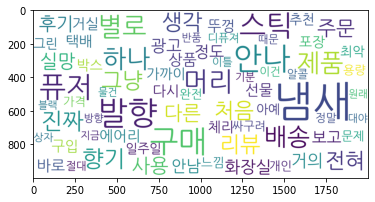

In [25]:
# 1Ï†ê Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=2000, height=1000, prefer_horizontal = 1, max_font_size=250, max_words=70)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú_1Ï†ê.png')